In [131]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
from sympy import *
from sympy import Abs
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print(sympy.__version__)
init_printing(use_unicode=True)
x, g, X, G = symbols('x g X G', cls = Function)

1.10.1


In [216]:
def laplace_transform_ac(g_ac,t,s, NC = True):
    return laplace_transform(g_ac.subs(t,-t), t, -s, noconds = NC)

def inverse_laplace_transform_ac(G_ac,s,t):
    return -inverse_laplace_transform(G_ac,s,t).subs(Heaviside(t),Heaviside(-t))


## Check that get desired properties for basic ftns

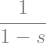

In [225]:
g_ac = sympy.exp(t)*Heaviside(-t)
G_ac = laplace_transform_ac(g_ac,t,s)
G_ac

In [226]:
g_temp = inverse_laplace_transform_ac(G_ac,s,t)
g_temp

## Anticausal Example 1

In [227]:
G1 = 0.5/(s-1) # pole at s = 1
G2 = -0.5/(s+1) # pole at s = -1

In [228]:
# ROC A Re[s] < -1
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(G2,s,t)
g_rocA

In [223]:
# ROC B -1 < Re[s] < 1 
g_rocB = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(G2,s,t)
g_rocB

In [236]:
# ROC C Re[s] > 1
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(G2,s,t)
g_rocC

## Anticausal Example 2

In [237]:
G1 = 2/3/(s-1) # pole at s = 1
G2 = -2/3/(s+2) # pole at s = -2

In [239]:
# ROC A -2 < Re[s] < 1 
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(G2,s,t)
N(g_rocA,4)

In [238]:
# ROC B Re[s] < -2
g_rocB = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(G2,s,t)
N(g_rocB,4)

In [240]:
# ROC C Re[s] > 1
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(G2,s,t)
N(g_rocC,4)

In [133]:
g = DiracDelta(t)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1.
G

## Define the LP of the second order diff eq

In [87]:
case = 0
# define the differential equation to solve
if case == 0:
    # input is a delta
    x0 = 1
    v0 = 2
    a = 2
    b = 7
    c = 3
    d = 1
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
elif case == 1:
    # input is a delta
    x0 = 2
    v0 = 4
    a = 1
    b = 5
    c = 6
    d = 4
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
elif case == 2:
    # input is an exponential
    a = 1
    b = 5
    c = 6
    d = 1
    x0 = 2
    v0 = 1
    x0p = x0
    v0p = v0
    g = sympy.exp(-2*t)*Heaviside(t)
    W = laplace_transform(d*g, t, s, noconds = True)
elif case == 3:
    # input is a step
    a = 1
    b = 5
    c = 6
    d = 1
    W = laplace_transform(d*Heaviside(t,0), t, s, noconds = True)
    xp = d/c
    ev = np.roots([a, b, c])
    const = inv([[1,1],[ev[0],ev[1]]])@[[x0-xp],[v0]]
    #print(const)

eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), W)
eom.replace(Heaviside(0), 0)

### Solve for the laplace transformed value that must be inverse transformed

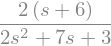

In [88]:
Xofs = solve(eom,X(s))[0]
Xofs

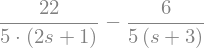

In [89]:
Xofs.apart()

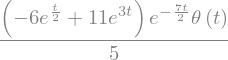

In [90]:
soln = inverse_laplace_transform(Xofs.apart(),s,t)
soln

In [91]:
# compute soln at time 0 to confirm that x(0) = x0
soln_x0 = soln.subs(t,0+np.finfo(float).eps)
if case < 3:
    print(f'Initial condition x(0) was '+f'{x0p:.2f}'+' and is '+f'{soln_x0:.2f}')
else:
    print(f'Initial condition x(0) was {((const[0]+const[1]+xp)[0]):.2f} and is '+str(soln_x0))    

Initial condition x(0) was 1.00 and is 1.00


In [92]:
# compute soln at time 0 to confirm that x(0) = x0
soln_v0 = soln.diff(t).replace(Heaviside(t), 1).subs(t,0+np.finfo(float).eps).replace(DiracDelta(0), 0)
soln_v0 = soln.diff(t).subs(t,0+np.finfo(float).eps)

if case < 3:
    print(f'Initial condition v(0) was '+f'{v0p:.2f}'+' and is '+f'{soln_v0:.2f}')
else:
    print(f'Initial condition x(0) was {((ev[0]*const[0]+ev[1]*const[1])[0]):.2f} and is '+f'{soln_v0:.2f}')    

Initial condition v(0) was 2.50 and is 2.50


## Example 2

In [93]:
x0 = 4.0
v0 = 7.0

In [94]:
eom  = Eq(3*(s**2 * X(s)-s*x0-v0)+30 * (s*X(s)-x0)+ 63 * X(s), 0)
eom

In [95]:
Xofs = solve(eom,X(s))
soln = inverse_laplace_transform(Xofs[0],s,t)
soln

In [96]:
y0 = soln.replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)
print(f'Pos IC was {x0:.1f} and is {y0:.2f}')

ydot = soln.diff(t).replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)
ydot0 = ydot.subs(t,0)
print(f'Vel IC was {v0:.1f} and is {ydot0:.2f}')

Pos IC was 4.0 and is 4.00
Vel IC was 7.0 and is 7.00


## Example 3

In [97]:
x0 = 5.0 
v0 = 7.0

[-3. -1.]


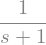

In [98]:
# a\ddot x + b\dot x + cx = dg
a = 2
b = 8
c = 6
d = 5
ev = np.roots([a,b,c])
print(ev) # check poles of system 

term = 0
if term == 0:
    g = sympy.exp(-t)*Heaviside(t)
    x0p = x0
    v0p = v0
elif term == 1:
    g = DiracDelta(t) 
    x0p = x0
    v0p = v0 + d/a
    
G = laplace_transform( g, t, s, noconds = True)
G

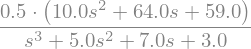

In [99]:
eom = Eq(a*(s**2 *X(s) -s*x0 - v0) + b*(s*X(s)-x0) + c*X(s), d*G)
Xofs = solve(eom,X(s)) 
Xofs[0]

In [100]:
y_soln = expand(inverse_laplace_transform(Xofs[0],s,t))
y_soln

In [101]:
y0_pos = y_soln.subs(t,0+np.finfo(float).eps) 
print(f'y(0+) was {x0p:.2f} and is {y0_pos:.2f}')

y(0+) was 5.00 and is 5.00


In [102]:
ydot0_pos = y_soln.diff(t).replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)  
print(f'dy/dt(0+) was {v0p:.2f} and is {ydot0_pos:.2f}')

dy/dt(0+) was 7.00 and is 7.00


## Circuit example from class

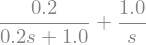

In [103]:
x0 = 2
RC = 1/5
W = laplace_transform(Heaviside(t,0), t, s, noconds = True)

eom = Eq((s*X(s)-x0) + X(s)/RC, W/RC)
Xofs = solve(eom,X(s)) 
Xofs[0].apart()

In [104]:
y_soln = inverse_laplace_transform(Xofs[0],s,t)
y_soln

In [105]:
y0_pos = y_soln.subs(t,0+np.finfo(float).eps) 
print(f'yy_soln was {x0:.2f} and is {y0_pos:.2f}')

yy_soln was 2.00 and is 2.00


## Example 3 in Rec 6

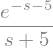

In [106]:
X = laplace_transform(sympy.exp(-5*t)*Heaviside(t-1), t, s, noconds = True)
X

## Example 2 in Rec 6

In [107]:
g = sympy.exp(-1*sympy.Abs(t))
g

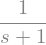

In [108]:
X = laplace_transform(g, t, s, noconds = True)
X

## 3rd order systems

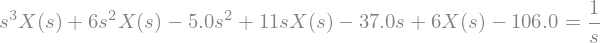

In [112]:
x, g, X = symbols('x g X', cls = Function)

x0 = 5.0 
v0 = 7.0
a0 = 9.0

a = 1
b = 6
c = 11
d = 6
W = laplace_transform(Heaviside(t,0), t, s, noconds = True)
eom  = Eq(a*(X(s)*s**3 - s**2*x0 - s*v0 - a0) + b*(s**2 *X(s)- s*x0 - v0) + c*(s*X(s) - x0) + d * X(s), W)
eom.replace(Heaviside(0), 0)

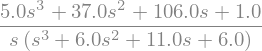

In [113]:
Xofs = solve(eom,X(s))[0]
Xofs

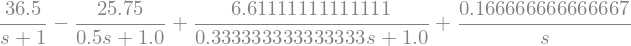

In [114]:
Xofs.apart()

In [115]:
expand((s+1)*(s+2)*(s+3))

In [116]:
x_soln = inverse_laplace_transform(Xofs.apart(),s,t)
x_soln.simplify()

In [117]:
n,d=fraction(Xofs)
6*n.subs(s,-3)/-3/-2/-1

In [118]:
print(f'{x_soln.subs(t,0+np.finfo(float).eps):.2f}')

5.00


In [119]:
print(f'{x_soln.diff().subs(t,0+np.finfo(float).eps):.2f}')

7.00


In [120]:
print(f'{x_soln.diff().diff().subs(t,0+np.finfo(float).eps):.2f}')

9.00


## Example 6 in Topic 13

In [124]:
x, g, X = symbols('x g X', cls = Function)

x0_minus = 0 
xdot0_minus = 0

a = 2
b = 7
c = 3
d = 1
W = laplace_transform(DiracDelta(t), t, s, noconds = True)
eom  = Eq(a*(s**2 *X(s)- s*x0_minus - xdot0_minus) + b*(s*X(s) - x0_minus) + c * X(s), d*W)

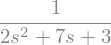

In [125]:
Xofs = solve(eom,X(s))[0]
Xofs

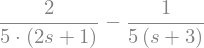

In [126]:
Xofs.apart()

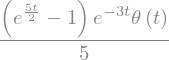

In [128]:
x_soln = inverse_laplace_transform(Xofs.apart(),s,t)
x_soln.simplify()

In [129]:
print(f'{x_soln.subs(t,0+np.finfo(float).eps):.2f}')

0.00


In [130]:
print(f'{x_soln.diff().subs(t,0+np.finfo(float).eps):.2f}')

0.50
